# Linear Regression with Python

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Author: Youssef Soultan

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# output the first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Statistical information about the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


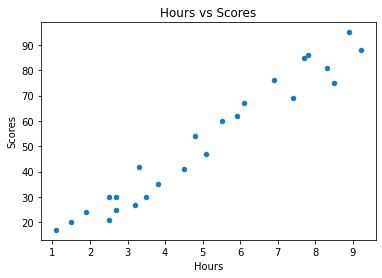

In [6]:
# Plotting the distribution of scores 
df.plot(x = 'Hours', y = 'Scores',kind = 'scatter');
plt.title('Hours vs Scores');

As we see here in the graph it's positive distribution

In [7]:
X = df['Hours']

In [8]:
Y = df['Scores']

### Split our data into training and testing sets

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [10]:
# Train the Algorithm
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), Y_train)

LinearRegression()

In [11]:
# Training Score
model.score(X_train.values.reshape(-1,1), Y_train)

0.9515510725211552

In [12]:
Y_predict = model.predict(X_test.values.reshape(-1,1))

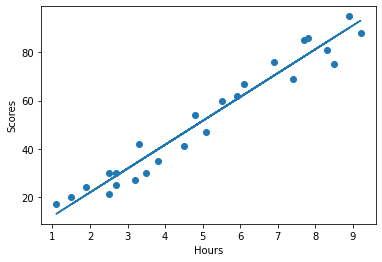

In [13]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.xlabel('Hours')
plt.ylabel('Scores');

In [14]:
# Comparing Actual vs Predict

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
df.head()

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### What will be predicted score if a student studies 9.25 hrs/day?

In [15]:
prediction_result = model.predict(np.array([[9.25]]))
print("Predicted Score : ", prediction_result[0])

Predicted Score :  93.69173248737538


### Model Evaluation 

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict)) 

Mean Absolute Error: 4.183859899002975
